In [103]:
import pandas as pd
import pickle as pk
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from tqdm import tqdm

In [104]:
df = pd.read_pickle("./Outcomes/Minimal_model.pkl")

In [105]:
df

,Time,Simplices
0,1950.000019,"[93.0, 47.0, 29.0, 83.0, 26.0, 118.0, 5.0, 1.0..."
1,1950.000932,"[77.0, 4.0, 40.0, 90.0, 96.0, 110.0, 120.0, 31..."
2,1950.001997,"[77.0, 32.0, 18.0, 95.0, 83.0, 112.0, 81.0, 11..."
3,1950.002598,"[47.0, 80.0, 35.0, 73.0, 5.0, 93.0, 117.0]"
4,1950.004427,"[60.0, 29.0, 110.0, 17.0, 1.0, 54.0, 14.0, 120..."
...,...,...
195840,2020.999481,"[78.0, 77.0, 67.0, 109.0, 52.0, 116.0, 65.0]"
195841,2020.999562,"[109.0, 45.0, 28.0, 65.0, 61.0, 8.0, 46.0, 63...."
195842,2020.999859,"[111.0, 78.0, 46.0, 50.0, 64.0, 52.0, 28.0, 62.0]"
195843,2020.999981,"[109.0, 114.0, 46.0, 111.0, 5.0, 8.0, 85.0, 72..."


In [106]:
# We truncate the Time column to integer values
df["Time"] = df["Time"].astype(int)

In [107]:
df["Size"] = df["Simplices"].apply(lambda x : len(x))

In [108]:
av_size=df.groupby('Time')['Size'].mean()

In [109]:
av_size=av_size.to_frame().reset_index()

In [110]:
av_size=av_size[av_size['Time']>=1980]

In [111]:
y1 = 1950
y2 = 2019
size_max = 25
size_min = 5

In [112]:
l1 = list(df[(df["Time"]==y1) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
l2 = list(df[(df["Time"]==y2) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
len(l2)

4145

In [113]:
over = np.zeros((len(l1),len(l2)))
inclusion = np.zeros((len(l1),len(l2)))

In [114]:
def overlap_size(a,b):
    return len(a & b)/len(a | b)

def inclusion_size(a,b):
    if b.issubset(a):
        return len(b) - len(a)
    elif a.issubset(b):
        return len(b) - len(a)
    else:
        return np.nan

In [115]:
dict_inc = {}
dict_over = {}

ran = range(1950,2019,2)

for k,y1 in enumerate(ran):
    size_max = 21
    size_min = 5
    print(y1)
    y2 = y1+1
    l1 = list(df[(df["Time"]==y1) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
    l2 = list(df[(df["Time"]==y2) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
    over = np.zeros((len(l1),len(l2)))
    inclusion = np.zeros((len(l1),len(l2)))

    for i, s1 in tqdm(enumerate(l1), total = len(l1)):
        for j, s2 in enumerate(l2):
            over[i][j] = overlap_size(set(s1),set(s2))
            inclusion[i][j] = inclusion_size(set(s1),set(s2))
    dict_inc[str(y1)] = inclusion
    dict_over[str(y1)] = over

1950


  1%|▏         | 23/1597 [00:00<00:15, 99.02it/s]

100%|██████████| 1597/1597 [00:11<00:00, 143.48it/s]


1952


100%|██████████| 1420/1420 [00:07<00:00, 196.26it/s]


1954


100%|██████████| 1303/1303 [00:05<00:00, 217.67it/s]


1956


100%|██████████| 1352/1352 [00:08<00:00, 158.97it/s]


1958


100%|██████████| 1516/1516 [00:10<00:00, 139.15it/s]


1960


100%|██████████| 1349/1349 [00:09<00:00, 136.44it/s]


1962


100%|██████████| 1325/1325 [00:09<00:00, 145.19it/s]


1964


100%|██████████| 1543/1543 [00:10<00:00, 150.65it/s]


1966


100%|██████████| 1583/1583 [00:10<00:00, 156.21it/s]


1968


100%|██████████| 1360/1360 [00:08<00:00, 167.22it/s]


1970


100%|██████████| 1599/1599 [00:09<00:00, 170.41it/s]


1972


100%|██████████| 1448/1448 [00:10<00:00, 138.08it/s]


1974


100%|██████████| 1806/1806 [00:11<00:00, 162.39it/s]


1976


100%|██████████| 1762/1762 [00:12<00:00, 141.03it/s]


1978


100%|██████████| 1829/1829 [00:13<00:00, 137.23it/s]


1980


100%|██████████| 1879/1879 [00:15<00:00, 117.50it/s]


1982


100%|██████████| 2237/2237 [00:19<00:00, 113.92it/s]


1984


100%|██████████| 2502/2502 [00:26<00:00, 96.15it/s] 


1986


100%|██████████| 2685/2685 [00:35<00:00, 76.57it/s]


1988


100%|██████████| 2981/2981 [00:36<00:00, 81.26it/s]


1990


100%|██████████| 3207/3207 [00:50<00:00, 64.09it/s]


1992


100%|██████████| 3521/3521 [01:04<00:00, 54.75it/s]


1994


100%|██████████| 3771/3771 [00:55<00:00, 67.47it/s]


1996


100%|██████████| 3904/3904 [01:49<00:00, 35.73it/s]


1998


100%|██████████| 4032/4032 [01:05<00:00, 61.46it/s]


2000


100%|██████████| 4121/4121 [01:18<00:00, 52.49it/s]


2002


100%|██████████| 4270/4270 [01:30<00:00, 47.12it/s]


2004


100%|██████████| 4155/4155 [01:25<00:00, 48.50it/s]


2006


100%|██████████| 4223/4223 [01:12<00:00, 58.55it/s]


2008


100%|██████████| 4200/4200 [01:13<00:00, 57.53it/s]


2010


100%|██████████| 4177/4177 [01:08<00:00, 61.31it/s]


2012


100%|██████████| 4302/4302 [01:14<00:00, 57.72it/s]


2014


100%|██████████| 4259/4259 [01:13<00:00, 57.91it/s]


2016


100%|██████████| 4127/4127 [01:15<00:00, 55.00it/s]


2018


100%|██████████| 4128/4128 [01:16<00:00, 53.65it/s]


In [116]:
means= np.zeros(len(ran))
stds= np.zeros(len(ran))
for i, y1 in enumerate(ran):    
    df2 = dict_inc[str(y1)].flatten()[~np.isnan(dict_inc[str(y1)].flatten())]
    means[i]= df2.mean()
    stds[i]= df2.std()
    print(y1, means[i], stds[i])

/tmp/ipykernel_75365/605600583.py:5: RuntimeWarning: Mean of empty slice.
  means[i]= df2.mean()
/home/david/.conda/envs/idealista/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/david/.conda/envs/idealista/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/david/.conda/envs/idealista/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/david/.conda/envs/idealista/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1950 9.0 0.0
1952 -4.0 0.0
1954 10.0 0.0
1956 8.0 0.0
1958 8.0 0.0
1960 -13.0 0.0
1962 nan nan
1964 9.0 0.0
1966 7.5 0.5
1968 -0.75 9.33742469849155
1970 -1.5 6.5
1972 -0.5 8.077747210701755
1974 5.25 9.202581159652981
1976 6.0 0.0
1978 -1.5 7.5
1980 7.5 2.5
1982 -0.6666666666666666 8.537498983243799
1984 -5.8 6.013318551349164
1986 0.7272727272727273 8.965498607955734
1988 2.1666666666666665 8.526103708285774
1990 0.5789473684210527 9.642645353754464
1992 1.9428571428571428 8.120319688087083
1994 -0.45454545454545453 7.9528569636513335
1996 -1.7333333333333334 8.631724431807742
1998 -0.6808510638297872 8.930241194185555
2000 0.6842105263157895 8.35853990174193
2002 -0.515625 9.118991493546586
2004 -0.3333333333333333 8.867185806499384
2006 1.0595238095238095 8.72169051775677
2008 0.9933333333333333 8.3158456508577
2010 0.06233062330623306 8.264195538679392
2012 -0.49244712990936557 8.64239726970743
2014 -0.3202979515828678 8.620372210261044
2016 0.7091690544412608 8.650816192678054
20

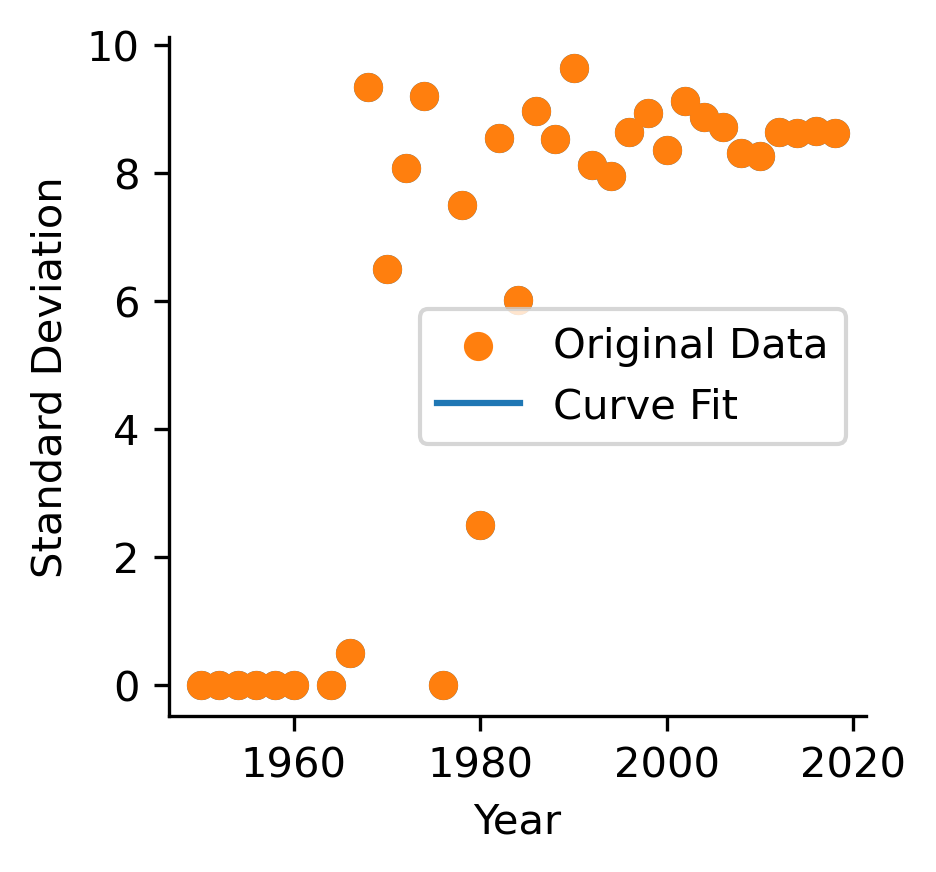

In [117]:
from scipy.interpolate import interp1d
from matplotlib.pyplot import errorbar
new_x = np.linspace(1950, 2019, 100)  # Adjust the number of points as needed

# Interpolate y-values for new_x
new_y = np.interp(new_x, np.array(ran), stds)
x=np.array(ran)
y=stds

fig, ax = plt.subplots(figsize=(3,3),dpi=300)
ax.scatter(x=x,y=y)

degree = 3  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, y, degree)
curve_fit = np.poly1d(coefficients)

# Evaluate the curve fit for new_x
new_y = curve_fit(new_x)

# Plot the original scatter plot
ax.scatter(x, y, label='Original Data')


# Plot the curve fit
ax.plot(new_x, new_y, label='Curve Fit')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Standard Deviation')
#plt.title('Std')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show legend
ax.legend()

# Display the plot
plt.show()


#errorbar(x=np.array(range(1980,2016,4)),y=means, yerr=stds)

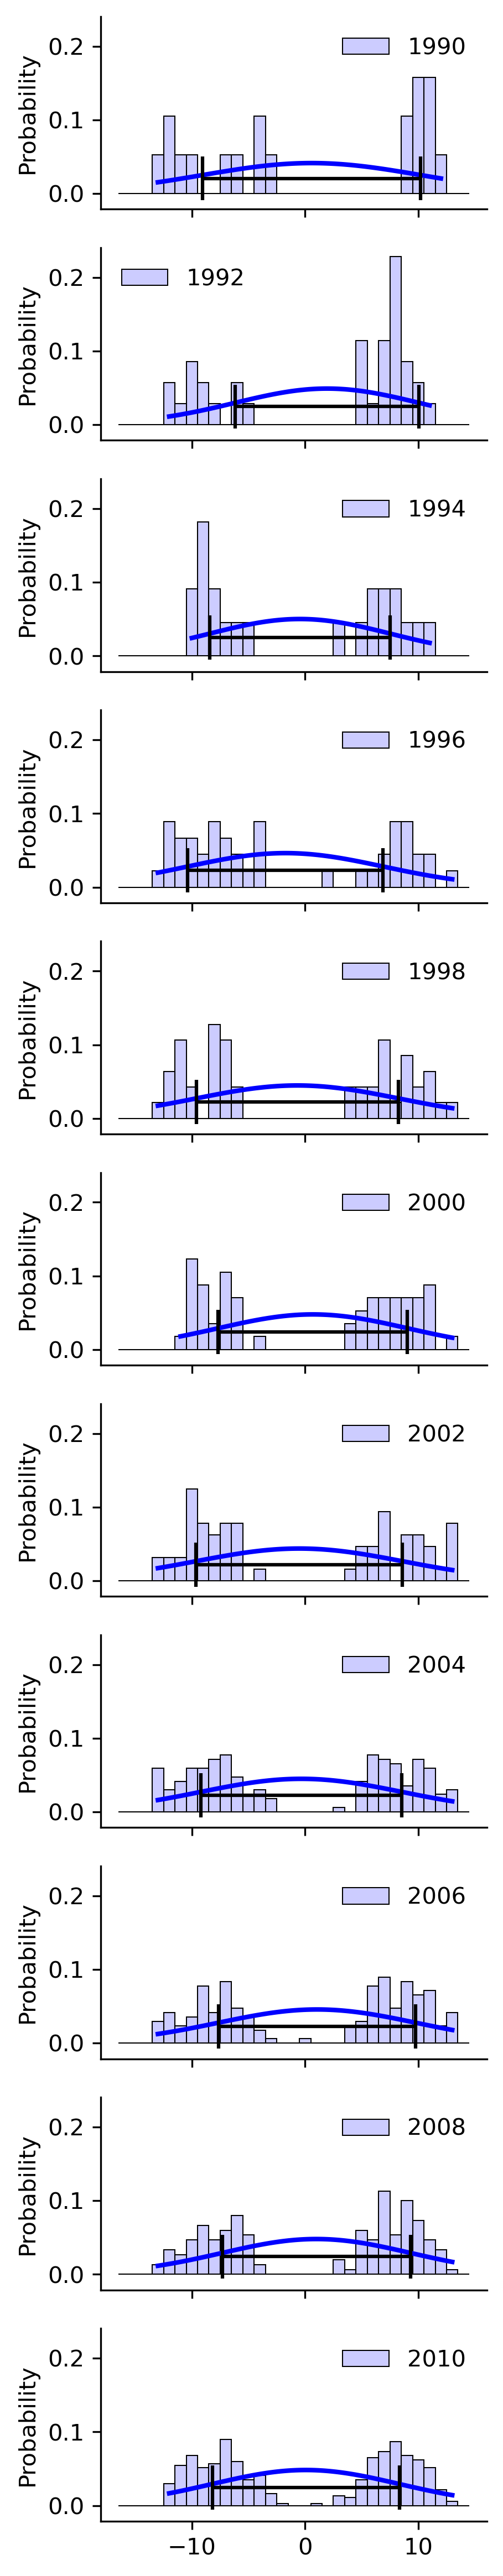

In [118]:
from scipy.stats import norm

size_max = 21
size_min = 5

x = 11

fig,ax=plt.subplots(nrows=x, ncols=1, sharex=True,figsize=(3,20),dpi=300,sharey=True)

for i, y1 in enumerate(range(1990,2012,2)):
    df1 = dict_inc[str(y1)].flatten()
    df1 = df1[~np.isnan(df1)]
    sns.histplot(df1, bins=np.array(range(size_min - size_max, size_max - size_min)) - 0.5,
                 stat="probability", label=str(y1), color="blue", alpha=0.2, ax=ax[i])
     # Fit Gaussian distribution to data
    mu, std = norm.fit(df1)
    x = np.linspace(df1.min(), df1.max(), 100)
    y = norm.pdf(x, mu, std)
    
    # Plot Gaussian curve
    ax[i].plot(x, y, '-', color="blue", linewidth=2)
    ax[i].legend(frameon=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    bar_height = max(y)/2
    ax[i].hlines(bar_height, mu - std, mu + std, color='black', linewidth=1.5, linestyle='-')
    ax[i].vlines([mu - std, mu + std], [bar_height-0.03, bar_height-0.03], [bar_height+0.03, bar_height+0.03], color='black', linewidth=1.5)


plt.show()